### Exploratory Spatial Data Analysis
______________

The conventional exploratory data analysis does not investigate the location component of the dataset explicitly but instead deals with the relationship between variables and how they affect each other. Correlation statistical methods are often used to explore the relationship between variables. In contrast, Exploratory Spatial Data Analysis (ESDA) correlates a specific variable to a location, taking into account the values of the same variable in the neighborhood. The methods used for this purpose are called Spatial Autocorrelation.

In [1]:
#pip install h3

In [4]:
# load dependencies'
# Import modules

import contextily as ctx

from collections import Counter
from pyproj import CRS
from pyproj import Transformer

from esda.moran import Moran

import pysal
import geopandas as gpd
import libpysal as lps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

import folium
import webbrowser
import os
import math
import chart_studio.plotly as py
import plotly.graph_objects as go

from h3 import h3
from folium import Map
from pysal.viz import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

import mapclassify as mc
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import pysal as ps
from pysal.explore import esda as esda
from matplotlib import colors as cls

import seaborn as sns
from shapely.geometry import Point

# scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency
import scipy.spatial.distance as ssd
from sklearn.cluster import DBSCAN

# sklearn
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

from splot.esda import moran_scatterplot
from splot.esda import plot_moran

In [5]:
df = pd.read_csv("Bremen_more_modified.csv", low_memory = False)
df.dtypes

type_of_accident                         int64
lighting_conditions                      int64
road_conditions                          int64
impact_on_obstacle_next_to_the_road      int64
location_innercity_extraurban            int64
street_class                           float64
kind_of_accident                         int64
gender                                 float64
feature_x                              float64
feature_y                              float64
day_of_week                              int64
vacation                                 int64
month                                    int64
hour_cat                                 int64
age                                      int64
casualty_age                             int64
casualty_gender                        float64
accident_categore                      float64
accident_severity                      float64
dtype: object

In [6]:
df1 = pd.read_csv("Bremen_cmore_modified.csv", low_memory = False)
df2 = pd.read_csv("Bremen_modified_.csv", low_memory = False)
x = df2.loc[:,['longitude', 'latitude']]
nw1 = pd.concat([x, df], axis = 'columns', sort = False)
nw2 = pd.concat([x, df1], axis = 'columns', sort = False)
nw1.dtypes

longitude                              float64
latitude                               float64
type_of_accident                         int64
lighting_conditions                      int64
road_conditions                          int64
impact_on_obstacle_next_to_the_road      int64
location_innercity_extraurban            int64
street_class                           float64
kind_of_accident                         int64
gender                                 float64
feature_x                              float64
feature_y                              float64
day_of_week                              int64
vacation                                 int64
month                                    int64
hour_cat                                 int64
age                                      int64
casualty_age                             int64
casualty_gender                        float64
accident_categore                      float64
accident_severity                      float64
dtype: object

In [7]:
crs = {'init': 'epsg:4326'}
geodf_nw1 = gpd.GeoDataFrame(
    nw1, crs=crs,geometry=gpd.points_from_xy(nw1.longitude, nw1.latitude))

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [8]:
geodf_nw1

,longitude,latitude,type_of_accident,lighting_conditions,road_conditions,impact_on_obstacle_next_to_the_road,location_innercity_extraurban,street_class,kind_of_accident,gender,...,day_of_week,vacation,month,hour_cat,age,casualty_age,casualty_gender,accident_categore,accident_severity,geometry
0,8.737263,53.143835,9,0,1,3,2,1.0,1,1.0,...,5,1,8,5,29,43,1.0,5.0,0.0,POINT (8.73726 53.14384)
1,8.914209,53.038981,5,0,0,5,1,5.0,3,2.0,...,3,1,9,4,81,54,2.0,3.0,0.0,POINT (8.91421 53.03898)
2,8.780575,53.068084,2,0,0,5,1,2.0,6,2.0,...,7,1,8,4,65,45,1.0,5.0,0.0,POINT (8.78058 53.06808)
3,8.778113,53.064216,2,0,0,4,1,5.0,6,1.0,...,5,1,8,2,91,46,1.0,3.0,0.0,POINT (8.77811 53.06422)
4,8.783901,53.065758,5,0,1,5,1,2.0,3,2.0,...,5,1,8,4,61,58,1.0,3.0,0.0,POINT (8.78390 53.06576)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34763,8.749113,53.160368,2,0,0,5,2,2.0,6,1.0,...,5,0,6,5,25,23,1.0,5.0,0.0,POINT (8.74911 53.16037)
34764,8.894172,53.059490,2,0,0,5,1,5.0,6,1.0,...,2,0,9,4,55,28,1.0,5.0,0.0,POINT (8.89417 53.05949)
34765,8.891053,53.071478,5,0,0,5,1,5.0,3,1.0,...,3,0,8,2,80,60,2.0,3.0,0.0,POINT (8.89105 53.07148)
34766,8.818448,53.077264,5,0,1,5,1,5.0,3,2.0,...,2,0,12,2,29,19,1.0,3.0,0.0,POINT (8.81845 53.07726)


In [9]:
crs = {'init': 'epsg:4647'}
geodf1_nw1 = gpd.GeoDataFrame(
    nw1, crs=crs,geometry=gpd.points_from_xy(nw1.feature_x, nw1.feature_y))

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [10]:
crs = {'init': 'epsg:4326'}
geodf_nw2 = gpd.GeoDataFrame(
    nw2, crs=crs,geometry=gpd.points_from_xy(nw2.longitude, nw2.latitude))

In [11]:
#u = df2['linrefx']
#v = df2['linrefy']
#g_coords = list(zip(u,v))
columnt = ['type_of_accident', 'lighting_conditions', 'road_conditions', 'impact_on_obstacle_next_to_the_road', 'location_innercity_extraurban', 'street_class', 'kind_of_accident', 'gender', 'day_of_week', 'vacation', 'month', 'hour_cat', 'age', 'casualty_age', 'casualty_gender','accident_categore']

Here, We start by looking at the spatial distribution of each variable alone. This will help us draw a picture of the multi-faceted view of the accidents we want to capture with our clustering. We use choropleth maps for the attributes (independent variable/predictors) and compare these choropleth maps:

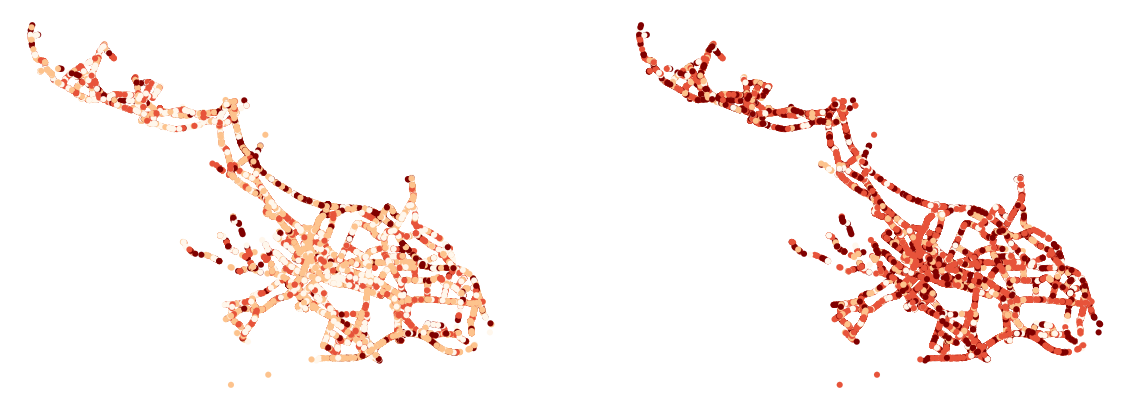

In [16]:
f, (ax1, ax2)  = plt.subplots(ncols=2, figsize=(20, 9))
geodf_nw1.plot(column='type_of_accident', label = True, scheme='naturalbreaks', k=4, cmap='OrRd', linewidth=0.1, ax=ax1)
ax1.set_axis_off()

geodf_nw1.plot(column='kind_of_accident', scheme='naturalbreaks', k=4, cmap='OrRd', linewidth=0.1, ax=ax2)
ax2.set_axis_off()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


C:\ProgramData\Anaconda3\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:




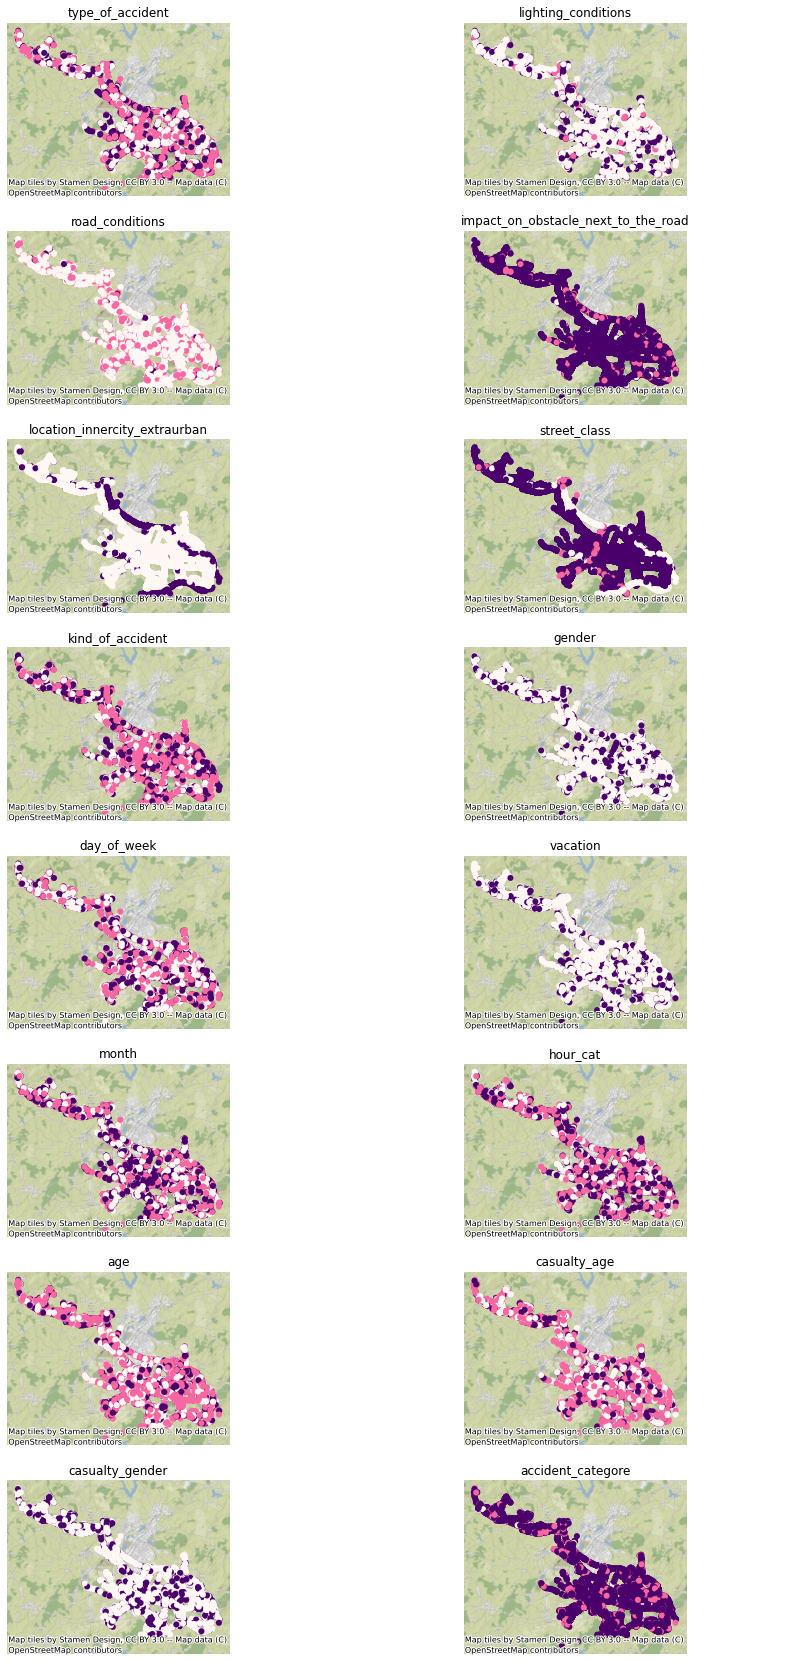

In [17]:
f, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
# Make the axes accessible with single indexing  fig.set_figheight(value_height)
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(columnt):
    # select the axis where the map will go
    #axs = 
    ax = axs[i]
    # Plot the map
    #db.plot(column=col, ax=ax, scheme='Quantiles', 
    #        linewidth=0, cmap='RdPu')
    mp = geodf_nw1.plot(col,  label = col, scheme='naturalbreaks', k=3, linewidth=0.1, cmap='RdPu', ax=ax)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    ax.set_aspect('equal')
    ctx.add_basemap(mp)
# Display the figure
plt.show()

Many visual patterns jump out from the maps, revealing both commonalities as
well as differences across the spatial distributions of the individual variables.
Several variables tend to vary in value across the study area
(`type_of_accident`, `kind_of_accident`, `gender`, `day_of_week`, `vacation`, `month`, `hour_cat`, `age`, `casualty_age`, and `casualty_gender`) while others
have a spatial trend that can be considerred as a cluster (`accident category`, `street class`,
`location innercity extraurban`, `impact on obstacle next to the road`). This is actually desirable; when variables have
different spatial distributions, each variable to contributes distinct 
information to the profiles of each cluster. However, if all variables display very similar 
spatial patterns, the amount of useful information across the maps is 
actually smaller than it appears, so cluster profiles may be much less useful as well.
It is also important to consider whether the variables display any
spatial autocorrelation, as this will affect the spatial structure of the
resulting clusters. 

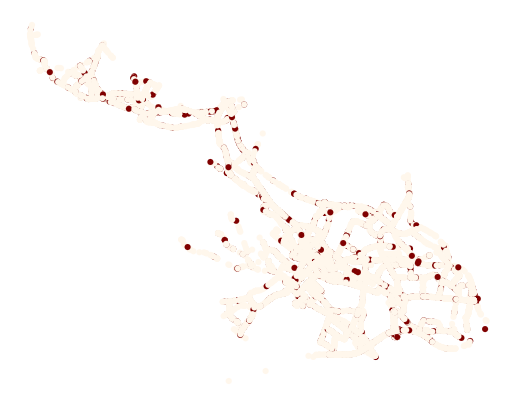

In [49]:
f, ax = plt.subplots(1, figsize=(9, 9))
geodf_nw1.plot(column='accident_severity', scheme='naturalbreaks', k=2, cmap='OrRd', linewidth=0.1, ax=ax)
ax.set_axis_off()
plt.show()

geodf_nw1['latitude'] = geodf_nw1['latitude'].astype((float)
geodf_nw1['longitude'] = geodf_nw1['longitude'].astype(float)
geodf_nw1['longitude'].dtypes                                   

In [9]:
inputCRS = CRS.from_epsg(4326)
outputCRS = CRS.from_epsg(4647)
transformer = Transformer.from_crs(inputCRS, outputCRS)
def project(a,b):
    return transformer.transform(a, b)

In [10]:
point_array = np.vstack(geodf1_nw1.geometry)
minthresh = lps.weights.min_threshold_distance(point_array, p=2)
print(minthresh)
a = nw1['longitude']
b = nw1['latitude']
zz = list(zip(a, b))
#pa = np.hstack((a,b))
dists = ssd.pdist(zz)
print('count dists = %d, min dist = %d'%(len(dists), min(dists)))


2631.6438318178157


MemoryError: Unable to allocate 4.50 GiB for an array with shape (604389528,) and data type float64

Moran's I is a commonly used measure for global spatial autocorrelation. We carry out this process so as to get a quick sense to what extent this is present in our dataset chosen. First, we need to build a spatial weights matrix that encodes the spatial relationships in the Bremen Data. 

In [69]:
def weight(data, lat = 'lat', lng = 'lng', thresh= 30, value = 'value'):
    '''
    Assigning weights based of distance band for the geodata fields that are points...
    '''
    u = data[lat]
    v = data[lng]
    coords = list(zip(u,v))
    w = lps.weights.DistanceBand(coords, threshold= thresh)
    y = data[value]
    return w, y

Next, we use the pysal library to create afunction that actually checks for the loccal and global spatial autocorrelation of individual variables. Here, the spatial autocorrelation is describing the presence (or absence) of spatial variations in each variable. Like, conventional correlation methods, Spatial autocorrelation has positive and negative values. Positive spatial autocorrelation is when areas close to each other have similar values (High-high or Low-low). Negative spatial autocorrelation indicates that neighborhood areas to be different (Low values next to high values).

In [87]:
def esdaMo(data, lat = 'lat', lng = 'lng', thresh= 30, value = 'value'):
    '''
    Focuses on the overall trend in the dataset and tells the degree of clustering in the dataset. The warning describes
    an observation as an island, i.e., a disconnected observation with no distance neighbours.
    The column here must be discrete or continuous.
    _________
        data : geopandas dataframe
        lat : float
            coordinate
        long : float
            coordinate
        value : string
            variable of interest. 
        Returns
    _________
        plot-graph and of the Moran I value, probability value and z score...
           
    '''
    # coords = [project(row[lat], row[lng]) for index, row in data.iterrows()]
    point_array = np.vstack(data.geometry)
    minthresh = lps.weights.min_threshold_distance(point_array)
    print('The minimum threshold distance across the points is %d'%(minthresh))
    
    w, y = weight(data, lat = lat, lng = lng, thresh= thresh, value = value)
    moran = Moran(y, w)
    plot_moran(moran, zstandard=True, figsize=(10,4))
    plt.show()
    print('I statistics value = {:.5f}, probability value = {:.4f}, z-score = {:.5f}'.format(moran.I, moran.p_sim, 
                                                                                             moran.z_sim))
    data['p_value'] = moran.p_norm
    data['z_score'] = moran.z
    data['I_value'] = moran.EI

The minimum threshold distance across the points is 2631


C:\Users\emeka\Anaconda3\lib\site-packages\libpysal\weights\weights.py:167: UserWarning:

The weights matrix is not fully connected: 
 There are 631 disconnected components.
 There are 185 islands with ids: 237, 352, 398, 1308, 2282, 2524, 2617, 2799, 2947, 3008, 3111, 3187, 3229, 3260, 3481, 3688, 4928, 4977, 5298, 5463, 5541, 5623, 5651, 5701, 6419, 6626, 6663, 6711, 6721, 6930, 6963, 7208, 7304, 7328, 7386, 7396, 7534, 7648, 7781, 7828, 8021, 8406, 8537, 8790, 8871, 9144, 9246, 9446, 9641, 9715, 9738, 9927, 10191, 10870, 11157, 11174, 11214, 11215, 11461, 11940, 12001, 12295, 12346, 12728, 12774, 12787, 12868, 12981, 12986, 13002, 13530, 13591, 13786, 14051, 14139, 14377, 14718, 14756, 14882, 15186, 15356, 15484, 15901, 16085, 16114, 16479, 16666, 16911, 17137, 17315, 17764, 17951, 18022, 18083, 18433, 18624, 18834, 19000, 19193, 19496, 19650, 19748, 19840, 19903, 20023, 20105, 20236, 20369, 20470, 20481, 20534, 20552, 20570, 20879, 21315, 21635, 22376, 22701, 22809, 22880, 23296, 2

('WARNING: ', 237, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 1308, ' is an island (no neighbors)')
('WARNING: ', 2282, ' is an island (no neighbors)')
('WARNING: ', 2524, ' is an island (no neighbors)')
('WARNING: ', 2617, ' is an island (no neighbors)')
('WARNING: ', 2799, ' is an island (no neighbors)')
('WARNING: ', 2947, ' is an island (no neighbors)')
('WARNING: ', 3008, ' is an island (no neighbors)')
('WARNING: ', 3111, ' is an island (no neighbors)')
('WARNING: ', 3187, ' is an island (no neighbors)')
('WARNING: ', 3229, ' is an island (no neighbors)')
('WARNING: ', 3260, ' is an island (no neighbors)')
('WARNING: ', 3481, ' is an island (no neighbors)')
('WARNING: ', 3688, ' is an island (no neighbors)')
('WARNING: ', 4928, ' is an island (no neighbors)')
('WARNING: ', 4977, ' is an island (no neighbors)')
('WARNING: ', 5298, ' is an island (no neighbors)')
('WARNING: ', 5

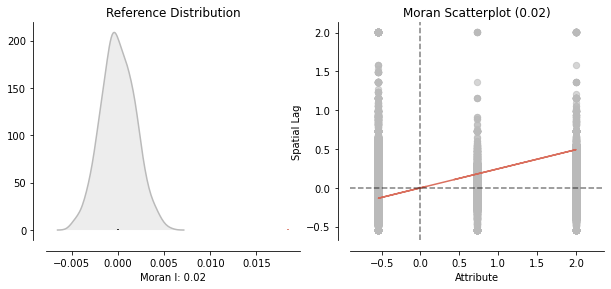

I statistics value = 0.01844, probability value = 0.0010, z-score = 9.95726


In [13]:
esdaMo(geodf1_nw1, 'feature_y', 'feature_x', 90, 'lighting_conditions')

In [88]:
def jcounts(data, lat = 'lat', lng = 'lng', thresh= 30, value = 'value'):
    """
    For binary dataset or field (target field)...
    '''
    Focuses on the overall trend in the dataset and tells the degree of clustering in the dataset. The warning describes
    an observation as an island, i.e., a disconnected observation with no distance neighbours.
    The column here must be discrete or continuous.
    _________
        data : geopandas dataframe
        lat : float
            coordinate
        long : float
            coordinate
        value : string
            variable of interest. 
        Returns
    _________
        plot-graph
        Output the value 
    """
    w, y = weight(data, lat = lat, lng = lng, thresh= thresh, value = value)
    #yb = y > y.median()
    #labels = ["0 Low", "1 High"] :: yb = [labels[i] for i in 1*yb]
    yb = 1 * (y > y.median())
    data['yb'] = yb
    # pseudo p-value
    print('probability value = {:.4f}'.format(jc.p_sim_bb))
    
    fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
    data.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)
    jc = esda.join_counts.Join_Counts(yb, w)
    
    sns.kdeplot(jc.sim_bb, shade=True)
    plt.vlines(jc.bb, 0, 0.025, color='r')
    plt.vlines(jc.mean_bb, 0, 0.025)
    plt.xlabel('BB Counts')

### Local Spatial Autocorrelation
Above, we have only determined that there is a positive spatial autocorrelation between the attribute properties in study area and their locations. But we have not detected where clusters are. Local Indicators of Spatial Association (LISA) is used to do that. LISA classifies areas into four groups: high values near to high values (HH), Low values with nearby low values (LL), Low values with high values in its neighborhood, and vice-versa.

In [83]:
# def ___():
def esdalocalmoran(data, lat = 'lat', lng = 'lng', thresh= 30, value = 'value'):
    """
    Shows the location of spatial variations in the dataset.
    -------
        data : geopandas dataframe
        lat : float
            coordinate
        long : float
            coordinate
        value : string
            variable of interest. 
        Returns
    -------
        graph and geoplot of the variable of interest.
    """
    w, y = weight(data, lat = lat, lng = lng, thresh= thresh, value = value)
    moran_loc = Moran_Local(y, w)
    
    fig, ax = moran_scatterplot(moran_loc)
    ax.set_xlabel('Donatns')
    ax.set_ylabel('Spatial Lag of Donatns')
    plt.show()
    
    print(moran_loc.p_sim)
    data['loc_p_value'] = moran_loc.p_sim
    data['loc_z_score'] = moran_loc.z_sim
    data['loc_I_score'] = moran_loc.EI_sim
    
    fig, ax = moran_scatterplot(moran_loc, p=0.05)
    ax.set_xlabel('Donatns')
    ax.set_ylabel('Spatial Lag of Donatns')
    plt.show()
    
    lisa_cluster(moran_loc, data, p=0.05, figsize = (9,9))
    plt.show()

C:\Users\emeka\Anaconda3\lib\site-packages\libpysal\weights\weights.py:167: UserWarning:

The weights matrix is not fully connected: 
 There are 631 disconnected components.
 There are 185 islands with ids: 237, 352, 398, 1308, 2282, 2524, 2617, 2799, 2947, 3008, 3111, 3187, 3229, 3260, 3481, 3688, 4928, 4977, 5298, 5463, 5541, 5623, 5651, 5701, 6419, 6626, 6663, 6711, 6721, 6930, 6963, 7208, 7304, 7328, 7386, 7396, 7534, 7648, 7781, 7828, 8021, 8406, 8537, 8790, 8871, 9144, 9246, 9446, 9641, 9715, 9738, 9927, 10191, 10870, 11157, 11174, 11214, 11215, 11461, 11940, 12001, 12295, 12346, 12728, 12774, 12787, 12868, 12981, 12986, 13002, 13530, 13591, 13786, 14051, 14139, 14377, 14718, 14756, 14882, 15186, 15356, 15484, 15901, 16085, 16114, 16479, 16666, 16911, 17137, 17315, 17764, 17951, 18022, 18083, 18433, 18624, 18834, 19000, 19193, 19496, 19650, 19748, 19840, 19903, 20023, 20105, 20236, 20369, 20470, 20481, 20534, 20552, 20570, 20879, 21315, 21635, 22376, 22701, 22809, 22880, 23296, 2

('WARNING: ', 237, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 1308, ' is an island (no neighbors)')
('WARNING: ', 2282, ' is an island (no neighbors)')
('WARNING: ', 2524, ' is an island (no neighbors)')
('WARNING: ', 2617, ' is an island (no neighbors)')
('WARNING: ', 2799, ' is an island (no neighbors)')
('WARNING: ', 2947, ' is an island (no neighbors)')
('WARNING: ', 3008, ' is an island (no neighbors)')
('WARNING: ', 3111, ' is an island (no neighbors)')
('WARNING: ', 3187, ' is an island (no neighbors)')
('WARNING: ', 3229, ' is an island (no neighbors)')
('WARNING: ', 3260, ' is an island (no neighbors)')
('WARNING: ', 3481, ' is an island (no neighbors)')
('WARNING: ', 3688, ' is an island (no neighbors)')
('WARNING: ', 4928, ' is an island (no neighbors)')
('WARNING: ', 4977, ' is an island (no neighbors)')
('WARNING: ', 5298, ' is an island (no neighbors)')
('WARNING: ', 5

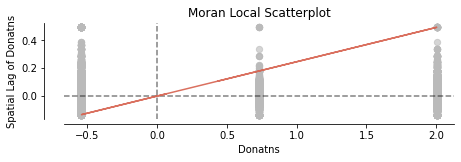

[0.305 0.239 0.067 ... 0.175 0.03  0.061]


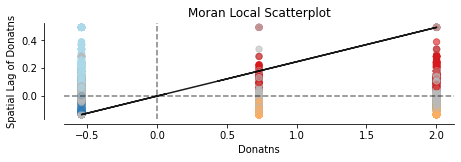

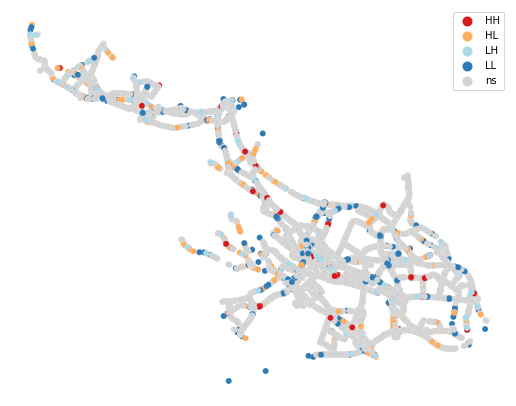

In [15]:
esdalocalmoran(geodf1_nw1, 'feature_y', 'feature_x', 90, 'lighting_conditions')

In [19]:
# Project to WGS 84 and save to json for plotting on interactive map
geo_locations_json = geodf_nw2['geometry'].to_crs(epsg=4326).to_json()

# Create interactive map and add SJER plot locations
geo_map = folium.Map([53.092778, 8.7306965],
                  zoom_start=14)

points = folium.GeoJson(geo_locations_json).add_to(geo_map)
folium.LayerControl().add_to(geo_map)

#SJER_map.add_child(points)
geo_map.save('map.html')

In [ ]:
fig = px.scatter_mapbox(geodf_nw2, color='accident_severity', 
                    color_continuous_scale=['rgb(214, 11, 40)', 'rgb(0, 20, 150)',], range_color=(0, 1),
                    lat = "latitude", lon = "longitude", hover_name="kind_of_accident", 
                    hover_data=["kind_of_accident", "type_of_accident", "lighting_conditions", "road_conditions", "impact_on_obstacle_next_to_the_road", "location_innercity_extraurban", "age", "casualty_age", "gender"],
                    zoom = 10, width = 950, height = 600, center= dict(lon = 8.7306965, lat = 53.092778)
                   )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#jcounts(geodf1_nw1, 'feature_y', 'feature_x', 90, 'accident_severity')